<h2>3:00:00 / 3:11:52</h2>

<h1>Workflow</h1>

<pre>
    0. Import important liberaries
    1. Get data ready (turn into tensors and batches)
    2. Build a logistic regression model
    3. Pick loss function and optimizer
    4. Build a training loop
    5. Evaluate your model
    6. How to improve our model
    7. Save your model
</pre>

<h2>0. Import important liberaries</h2>

In [1]:
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

<h2>1. Get data ready (turn into tensors and batches</h2>

<h3>Download datasets</h3>

In [2]:
train_dataset = datasets.FashionMNIST(root="/dataset", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root="/dataset", train=False, transform=transforms.ToTensor())

In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

<h2>2. Convert data into batches</h2>

In [5]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
len(train_loader) # 60000 / 64 = 938

938

In [7]:
len(test_loader) #10000 / 64 = 157

157

<h2>3. Build logistic model</h2>

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self, in_dim, n_class):
        super().__init__()
        self.linear = nn.Linear(in_dim, n_class)

    def forward(self, x):
        out = self.linear(x)
        return out

In [9]:
model = LogisticRegression(28*28, 10) #28*28 = 784

In [10]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [11]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7214e-02,  2.2102e-02,  2.1541e-02,  ...,  1.5774e-02,
                       -5.7335e-03, -8.6633e-03],
                      [ 9.7245e-03, -5.6251e-04, -1.6933e-02,  ...,  1.4150e-02,
                       -3.4207e-03,  3.0677e-02],
                      [ 7.4151e-03,  2.0858e-05, -7.4506e-03,  ..., -7.1235e-05,
                       -1.3104e-02, -1.2686e-02],
                      ...,
                      [-1.8328e-02,  1.9978e-03,  3.4430e-02,  ...,  1.1305e-02,
                        4.2498e-03, -1.6238e-02],
                      [-1.2882e-03, -3.1160e-03,  3.0671e-02,  ...,  2.7264e-02,
                        1.3149e-02, -1.4420e-02],
                      [ 2.4358e-02, -1.7245e-02, -2.3476e-04,  ..., -1.6670e-02,
                        3.0632e-02,  3.1330e-02]])),
             ('linear.bias',
              tensor([ 0.0115,  0.0178, -0.0044,  0.0110, -0.0306,  0.0146,  0.0264,  0.0315,
                       0.0275,

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #Code for GPU

In [13]:
device

'cuda'

In [14]:
model = model.to(device) #Send model to tun at GPU

<h2>4. Pick a loss function and optimizer</h2>

In [15]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [16]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.7214e-02,  2.2102e-02,  2.1541e-02,  ...,  1.5774e-02,
          -5.7335e-03, -8.6633e-03],
         [ 9.7245e-03, -5.6251e-04, -1.6933e-02,  ...,  1.4150e-02,
          -3.4207e-03,  3.0677e-02],
         [ 7.4151e-03,  2.0858e-05, -7.4506e-03,  ..., -7.1235e-05,
          -1.3104e-02, -1.2686e-02],
         ...,
         [-1.8328e-02,  1.9978e-03,  3.4430e-02,  ...,  1.1305e-02,
           4.2498e-03, -1.6238e-02],
         [-1.2882e-03, -3.1160e-03,  3.0671e-02,  ...,  2.7264e-02,
           1.3149e-02, -1.4420e-02],
         [ 2.4358e-02, -1.7245e-02, -2.3476e-04,  ..., -1.6670e-02,
           3.0632e-02,  3.1330e-02]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.0115,  0.0178, -0.0044,  0.0110, -0.0306,  0.0146,  0.0264,  0.0315,
          0.0275, -0.0038], device='cuda:0', requires_grad=True)]

In [17]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7214e-02,  2.2102e-02,  2.1541e-02,  ...,  1.5774e-02,
                       -5.7335e-03, -8.6633e-03],
                      [ 9.7245e-03, -5.6251e-04, -1.6933e-02,  ...,  1.4150e-02,
                       -3.4207e-03,  3.0677e-02],
                      [ 7.4151e-03,  2.0858e-05, -7.4506e-03,  ..., -7.1235e-05,
                       -1.3104e-02, -1.2686e-02],
                      ...,
                      [-1.8328e-02,  1.9978e-03,  3.4430e-02,  ...,  1.1305e-02,
                        4.2498e-03, -1.6238e-02],
                      [-1.2882e-03, -3.1160e-03,  3.0671e-02,  ...,  2.7264e-02,
                        1.3149e-02, -1.4420e-02],
                      [ 2.4358e-02, -1.7245e-02, -2.3476e-04,  ..., -1.6670e-02,
                        3.0632e-02,  3.1330e-02]], device='cuda:0')),
             ('linear.bias',
              tensor([ 0.0115,  0.0178, -0.0044,  0.0110, -0.0306,  0.0146,  0.0264,  0.0315,
             

<h2>5. Building a training loop</h2>

In [18]:
num_epochs = 8
for epoch in range(num_epochs):
    print('* ' *24)
    print(f'epoch {epoch +1}')
    since = time.time()
    running_loss = 0.0
    running_accu = 0.0
    model.train()
    for i, data in enumerate(train_loader, 1): #937
        img, label = data
        img = img.view(img.size(0),-1)
        img = img.to(device)
        label = label.to(device)
        out = model(img) #forward pass
        loss = criterion(out, label)
        running_loss += loss.item()
        _,pred = torch.max(out, 1)
        running_accu += (pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward() #backward pass
        optimizer.step()
        if i % 300 == 0:
            print(f'[{epoch+1} / {num_epochs}], Loss: {running_loss / i:.6f}, Accuracy: {running_accu/i:.6f}')
    print(f'Finish {epoch+1} Epoch, Loss: {running_loss/i:.6f}, Accu: {running_accu/i:.6f}')

    
    """6. Evaluate your model"""
    model.eval()
    eval_loss = 0.
    eval_accu = 0.
    for data in test_loader:
        img,label = data
        img = img.view(img.size(0),-1)
        img = img.to(device)
        label = label.to(device)
        with torch.no_grad():
            out = model(img)
            loss = criterion(out,label)
        eval_loss += loss.item()
        _,pred = torch.max(out, 1)
        eval_accu += (pred == label).float().mean()
    print()
    
    print(f'Test loss: {eval_loss / len(test_loader):.6f}, Accu: {eval_accu / len(train_loader):.6f}')
    print(f'Time:{(time.time() - since):.1f} s')


* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 1
[1 / 8], Loss: 1.987956, Accuracy: 0.420885
[1 / 8], Loss: 1.812400, Accuracy: 0.530599
[1 / 8], Loss: 1.685637, Accuracy: 0.572309
Finish 1 Epoch, Loss: 1.671120, Accu: 0.575860

Test loss: 1.342375, Accu: 0.108992
Time:10.0 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 2
[2 / 8], Loss: 1.276747, Accuracy: 0.668073
[2 / 8], Loss: 1.233077, Accuracy: 0.668281
[2 / 8], Loss: 1.194156, Accuracy: 0.671927
Finish 2 Epoch, Loss: 1.189435, Accu: 0.672658

Test loss: 1.091769, Accu: 0.111840
Time:10.0 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 3
[3 / 8], Loss: 1.058993, Accuracy: 0.682656
[3 / 8], Loss: 1.035798, Accuracy: 0.691771
[3 / 8], Loss: 1.018139, Accuracy: 0.694983
Finish 3 Epoch, Loss: 1.016750, Accu: 0.694879

Test loss: 0.974933, Accu: 0.115838
Time:10.0 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 4
[4 / 8], Loss: 0.951116, Accuracy: 0.710104
[4 / 8], Loss: 0.938820, Accuracy: 0.711693


<h2>7. Visualize how model is doing</h2>

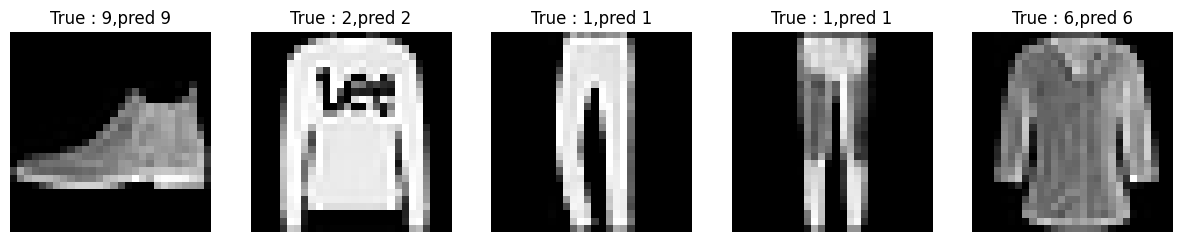

In [19]:
images, labels = next(iter(test_loader))
images = images.reshape(-1,28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_,predicted = torch.max(outputs,1)
fig,ax = plt.subplots(1,5,figsize=(15,3))
for i in range(5):
    ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
    ax[i].set_title(f'True : {labels[i].item()},pred {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

<h2>7. Save the model</h2>

In [20]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7213e-02,  2.2126e-02,  2.1706e-02,  ...,  1.1834e-02,
                       -6.9490e-03, -8.7366e-03],
                      [ 9.7234e-03, -5.6452e-04, -1.6954e-02,  ...,  1.3181e-02,
                       -3.6983e-03,  3.0641e-02],
                      [ 7.4124e-03,  1.9627e-05, -7.4558e-03,  ...,  4.9532e-03,
                       -1.2515e-02, -1.2604e-02],
                      ...,
                      [-1.8328e-02,  1.9952e-03,  3.4417e-02,  ...,  9.6521e-03,
                        3.6928e-03, -1.6293e-02],
                      [-1.2887e-03, -3.1221e-03,  3.0594e-02,  ...,  2.4633e-02,
                        1.2633e-02, -1.4417e-02],
                      [ 2.4357e-02, -1.7247e-02, -2.5520e-04,  ..., -1.5828e-02,
                        3.1255e-02,  3.1401e-02]], device='cuda:0')),
             ('linear.bias',
              tensor([ 0.0086,  0.0252, -0.0412,  0.0049, -0.1303,  0.2677,  0.0384,  0.0543,
             

In [21]:
torch.save(model.state_dict(),'./LogisticRegression_model.pth')